## **To predict diabetes using PIMA diabetes data**

**Importing libraries**

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
df = pd.read_csv("pima-data.csv")

In [120]:
df.shape

(768, 10)

In [121]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [122]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

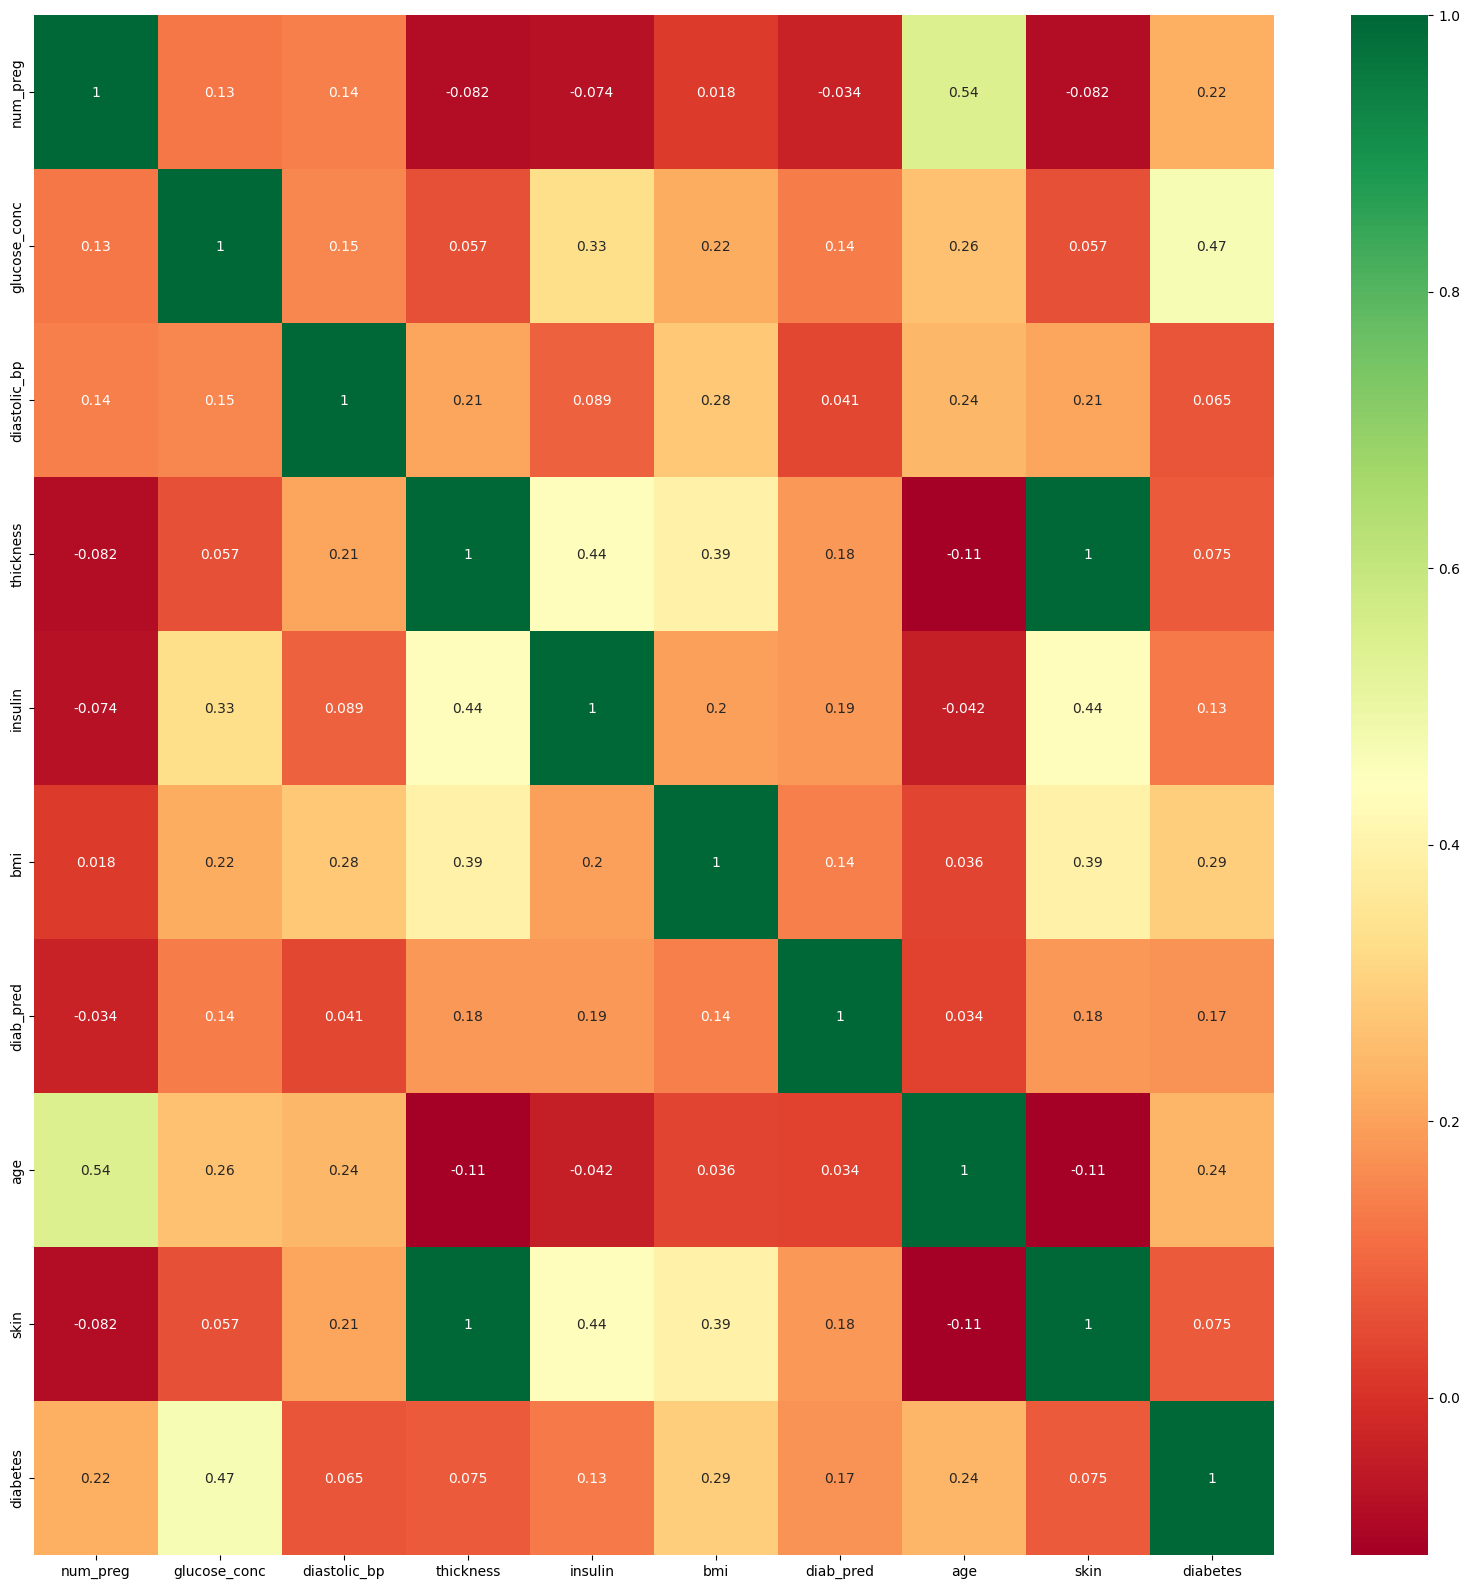

In [123]:
# correlation
import seaborn as sns
import matplotlib.pyplot as plt

# get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# plot heat map
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

In [124]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


**Changing the diabetes column data from boolean to number**

In [125]:
diabetes_map = {True:1 , False:0}

In [126]:
df.diabetes = df['diabetes'].map(diabetes_map)

In [127]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [128]:
diabetes_true_count = len(df.loc[df['diabetes'] == True])
diabetes_false_count = len(df.loc[df['diabetes'] == False])

In [129]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [130]:
# Train Test Split

from sklearn.model_selection import train_test_split
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
predicted_class = ['diabetes']

In [131]:
X = df[feature_columns].values
y = df[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

**Check how many other missing(zero) values**

In [132]:
# Count zero values in each column
zero_counts = (df == 0).sum()

# Print column names and count of zero values
for column_name, zero_count in zero_counts.items():
    print(f"Column '{column_name}' has {zero_count} zero values.")

Column 'num_preg' has 111 zero values.
Column 'glucose_conc' has 5 zero values.
Column 'diastolic_bp' has 35 zero values.
Column 'thickness' has 227 zero values.
Column 'insulin' has 374 zero values.
Column 'bmi' has 11 zero values.
Column 'diab_pred' has 0 zero values.
Column 'age' has 0 zero values.
Column 'skin' has 227 zero values.
Column 'diabetes' has 500 zero values.


In [133]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(strategy='mean')

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [134]:
# apply algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest_model = RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train, y_train)

# Predict the target values on the testing data
y_pred = random_forest_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

<ipython-input-134-6691adb15c10>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


Accuracy: 0.7489177489177489


In [135]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [136]:
# Hyperparamter optimization using randomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [137]:
classifier = xgboost.XGBClassifier()

In [138]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [139]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [140]:
from datetime import datetime
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 2.42 seconds.


In [141]:
classifier = random_search.best_estimator_

In [142]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [143]:
y_pred = classifier.predict(X_test)

In [144]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)

print (cm)
print(score)

[[122  22]
 [ 37  50]]
0.7445887445887446


In [145]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train,cv=10)

In [146]:
score

array([0.72222222, 0.75925926, 0.77777778, 0.77777778, 0.64814815,
       0.72222222, 0.83333333, 0.69811321, 0.81132075, 0.77358491])

In [147]:
score.mean()

0.7523759608665268